Code references

The first reference is from a 25-hour udemy course that I have passed:
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733454?start=15#overview

The rest of the references are from Kaggle and GitHub and search other people's work
https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression
https://www.kaggle.com/code/marcosvafg/iesb-cia035-aula-03-cross-validation-e-oob
https://www.kaggle.com/code/raihanrizkidwiputra/heart-disease-classification
https://www.kaggle.com/code/raihanrizkidwiputra/heart-disease-classification
https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression
https://www.kaggle.com/code/ekramasif/cardiovasculardiseasepredictionusingml
https://www.kaggle.com/code/mertoezcan/comparison-of-different-machine-learning-models
https://www.kaggle.com/code/kazimshaikh/cardiovascular-classification
https://www.kaggle.com/code/zawlinmaung/eda-decisiontree-randomforest-and-adaboost
https://github.com/LeadingIndiaAI/Cardiovascular-Disease-Prediction/blob/master/prediction.ipynb
https://github.com/abhijeetgawas19/CardioVascular-Disease-Prediction-Machine-Learning/blob/main/CardioVascular_Disease_Prediction_Completed.ipynb
https://github.com/shreeya07/Predicting-Cardiovascular-Disease/blob/master/Predicting%20Possibility%20of%20Cardiovascular%20disease.ipynb
https://github.com/nahacka/Cardiovascular_Disease_Prediction/blob/main/Cardio_VN.ipynb

I do believe that my course was the most useful one since people had a different ideas about the dataset and ways of analyzing that. I also preferred to search inside https://scikit-learn.org/stable/ which was very good.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report, recall_score, precision_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.svm import SVC
import warnings
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('cardio_train.csv', sep = ';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
df.drop(['id'],axis=1,inplace=True)

In [7]:
df['age'] = df['age'].map(lambda x: round(x/365.25,2)).astype(int)

<AxesSubplot: >

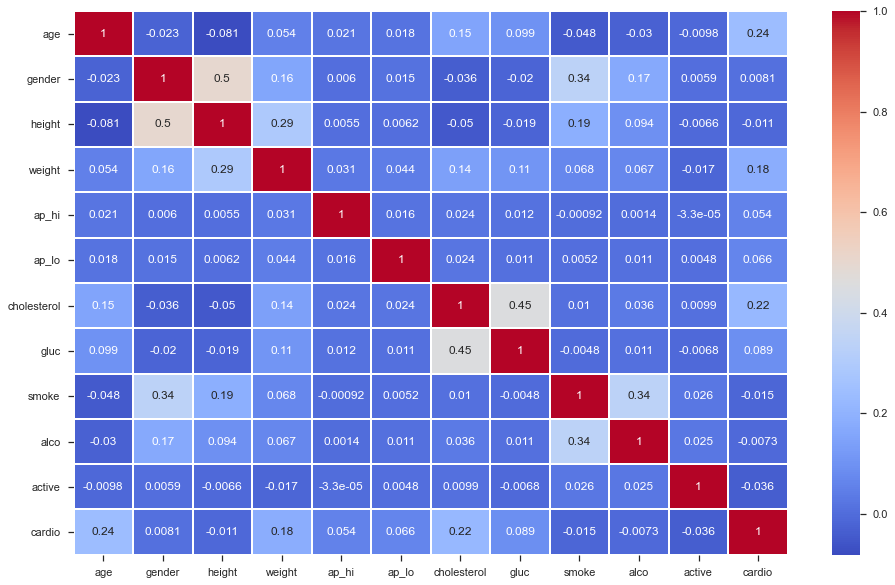

In [8]:
sns.set_context("notebook", font_scale=1)
plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, linewidth=2,cmap='coolwarm')

<AxesSubplot: xlabel='cardio', ylabel='count'>

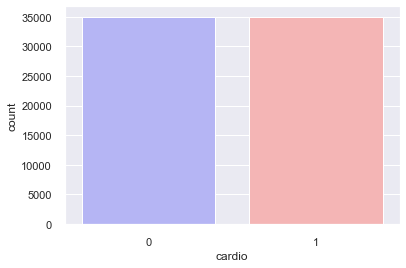

In [9]:
sns.set(font_scale=1)
sns.countplot(x='cardio',data=df,palette='bwr')


<AxesSubplot: xlabel='age', ylabel='Count'>

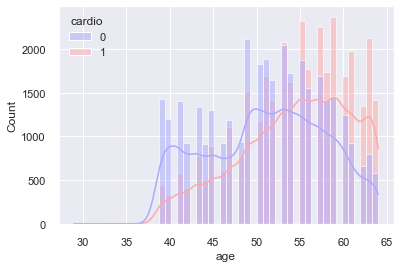

In [10]:
sns.set()
sns.histplot(data=df,x='age',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='height', ylabel='Count'>

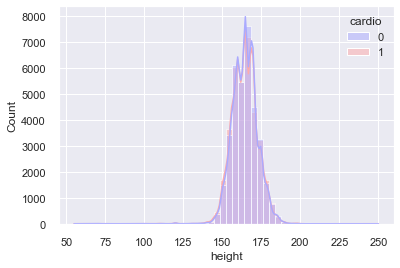

In [11]:
sns.set()
sns.histplot(data=df,x='height',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='weight', ylabel='Count'>

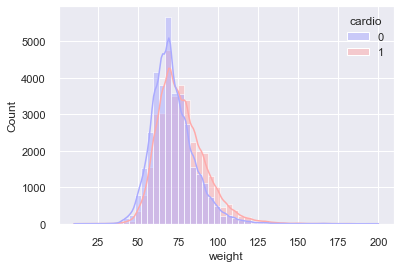

In [12]:
sns.set()
sns.histplot(data=df,x='weight',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='ap_lo', ylabel='Count'>

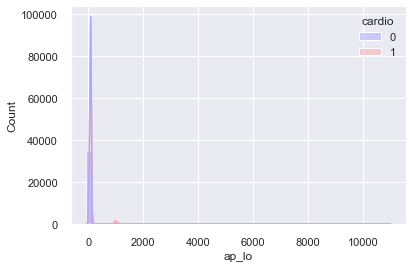

In [13]:
sns.set()
sns.histplot(data=df,x='ap_lo',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='ap_hi', ylabel='Count'>

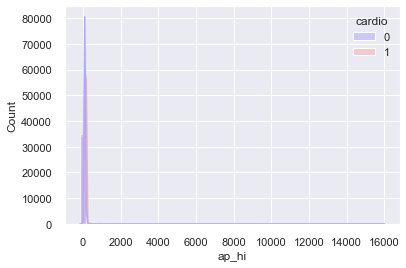

In [14]:
sns.set()
sns.histplot(data=df,x='ap_hi',kde=True,bins=50,hue='cardio',palette='bwr')

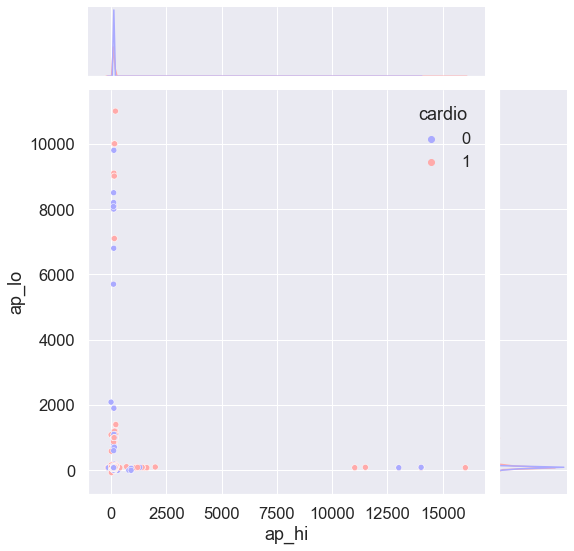

In [15]:
sns.set()
sns.set_context("notebook", font_scale=1.5)
g = sns.JointGrid(data = df, x = 'ap_hi', y = 'ap_lo', hue = 'cardio', palette = 'bwr', height = 8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

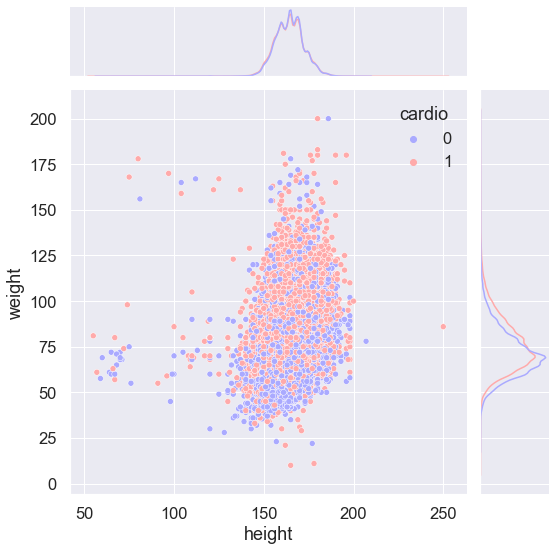

In [16]:
sns.set()
sns.set_context("notebook", font_scale=1.5)
g = sns.JointGrid(data = df, x = 'height', y = 'weight', hue = 'cardio', palette = 'bwr', height = 8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

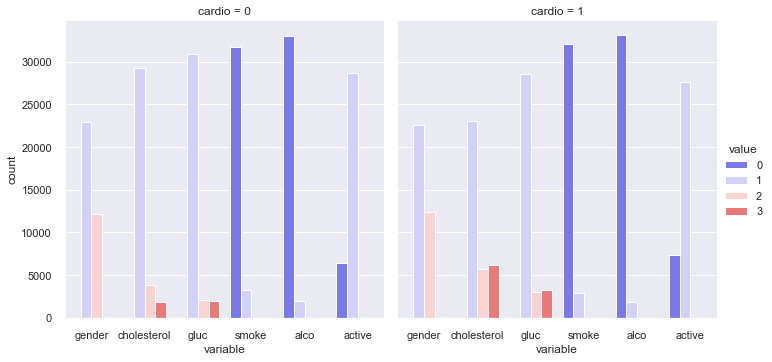

In [17]:
sns.set()
df_categorical = pd.melt(df, id_vars=['cardio'], value_vars=['gender','cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df_categorical, kind="count",palette='bwr')

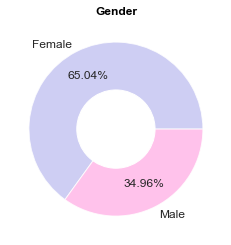

In [18]:
labels=['Female', 'Male']
order=df['gender'].value_counts().index

plt.title('Gender', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")
colors =['#c2c2f0','#ffb3e6']
plt.pie(df['gender'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


*************************
percentage of CVD Presence based on Cholesterol:
*************************
cholesterol  cardio
1            0         55.99
             1         44.01
2            1         60.22
             0         39.78
3            1         76.54
             0         23.46
Name: cardio, dtype: float64
*************************
The total number of each group:
*************************


1    45530
2    24470
Name: gender, dtype: int64

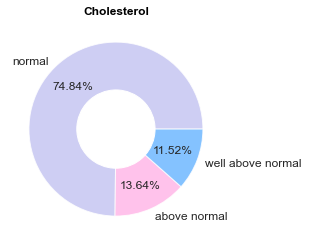

In [19]:
labels=['normal', 'above normal', 'well above normal']
order=df['cholesterol'].value_counts().index

plt.title('Cholesterol', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")
colors =['#c2c2f0','#ffb3e6', '#66b3ff','#c2c2f0']
plt.pie(df['cholesterol'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)
print('*' * 25)
print("percentage of CVD Presence based on Cholesterol:")
print('*' * 25)
print(round(df.groupby('cholesterol')['cardio'].value_counts() / df.groupby('cholesterol')['cardio'].count() * 100,2))
print('*' * 25)
print("The total number of each group:")
print('*' * 25)
df.gender.value_counts(dropna=False)

*************************
percentage of CVD Presence based on glucose:
*************************
gluc  cardio
1     0         51.94
      1         48.06
2     1         59.31
      0         40.69
3     1         62.20
      0         37.80
Name: cardio, dtype: float64
*************************
The total number of each group:
*************************


1    45530
2    24470
Name: gender, dtype: int64

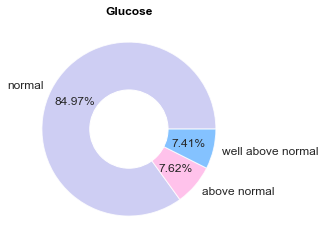

In [20]:
labels=['normal', 'above normal', 'well above normal']
order=df['gluc'].value_counts().index
plt.title('Glucose', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")
colors =['#c2c2f0','#ffb3e6', '#66b3ff','#c2c2f0']
plt.pie(df['gluc'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)
print('*' * 25)
print("percentage of CVD Presence based on glucose:")
print('*' * 25)
print(round(df.groupby('gluc')['cardio'].value_counts() / df.groupby('gluc')['cardio'].count() * 100,2))
print('*' * 25)
print("The total number of each group:")
print('*' * 25)
df.gender.value_counts(dropna=False)

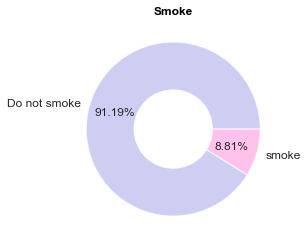

In [21]:
labels=['Do not smoke', 'smoke']
order=df['smoke'].value_counts().index

plt.title('Smoke', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")

colors =['#c2c2f0','#ffb3e6', '#66b3ff','#c2c2f0']
plt.pie(df['smoke'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


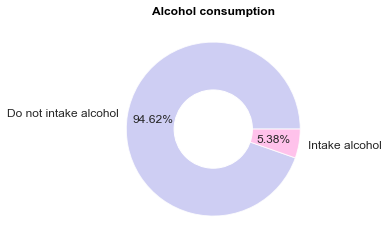

In [22]:
labels=['Do not intake alcohol', 'Intake alcohol']
order=df['alco'].value_counts().index

plt.title('Alcohol consumption', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")

colors =['#c2c2f0','#ffb3e6', '#66b3ff','#c2c2f0']
plt.pie(df['alco'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


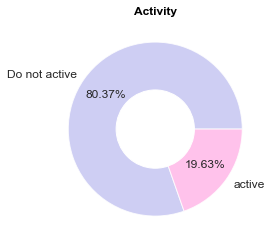

In [23]:
labels=['Do not active', 'active']
order=df['active'].value_counts().index

plt.title('Activity', fontweight='heavy', 
             fontsize='12', fontfamily='sans-serif', color="black")
colors =['#c2c2f0','#ffb3e6', '#66b3ff','#c2c2f0']
plt.pie(df['active'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12},colors = colors)
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.807329,6.762506,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


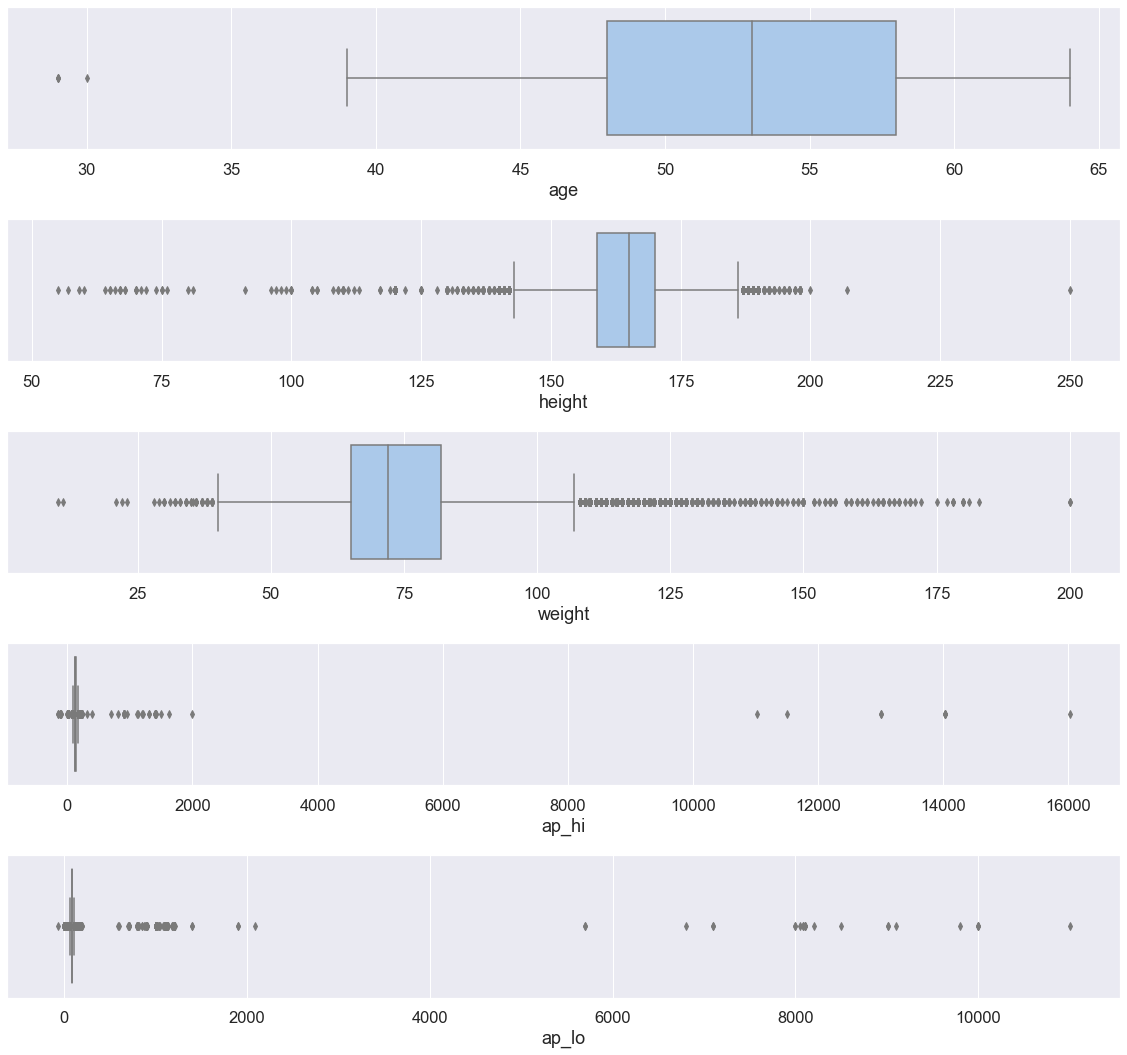

In [26]:
sns.set_context("notebook", font_scale=1.5)
f, axs = plt.subplots(5,1,figsize = (16,15))
colors =['#c2c2f0','#ffb3e6']
sns.boxplot(x=df['age'],ax=axs[0],palette='pastel')
sns.boxplot(x=df['height'],ax=axs[1],palette='pastel')
sns.boxplot(x=df['weight'],ax=axs[2],palette='pastel')
sns.boxplot(x=df['ap_hi'],ax=axs[3],palette='pastel')
sns.boxplot(x=df['ap_lo'],ax=axs[4],palette='pastel')

plt.tight_layout()


In [27]:
def outliers(x):
    Q1, Q3 = np.percentile(x, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR*3)
    upper_bound = Q3 + (IQR*3)
    
    print(f'Q1:{Q1}, Q3:{Q3}, IQR:{IQR}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((x> upper_bound) | (x < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

In [28]:
systolic_outlier=list(outliers(df['ap_hi'])[0][0])
df.iloc[systolic_outlier]

diastolic_outlier=list(outliers(df['ap_lo'])[0][0])
df.iloc[diastolic_outlier]

height_outlier=list(outliers(df['height'])[0][0])
df.iloc[height_outlier]

weight_outlier=list(outliers(df['weight'])[0][0])
df.iloc[weight_outlier]


Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 288
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1136
Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 93
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 171


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
338,57,1,157,142.0,120,80,1,1,0,0,1,1
389,45,2,165,169.0,120,80,1,1,0,0,1,0
435,45,1,186,200.0,130,70,1,1,0,0,0,0
1197,54,1,171,139.0,140,90,1,1,0,0,1,1
1270,52,2,175,150.0,180,120,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66832,49,2,180,145.0,130,90,1,1,0,0,1,0
66928,63,2,170,134.0,140,100,3,3,0,0,1,0
67121,44,2,178,146.0,140,1100,1,1,1,0,1,1
67435,50,2,190,147.0,150,90,1,2,0,1,1,1


In [29]:
outliers= systolic_outlier+ diastolic_outlier+height_outlier+ weight_outlier
outliers= list(set(outliers))
len(outliers)

1624

In [30]:
df=df.drop(index = outliers).reset_index()
df.drop(columns=['index'], inplace=True)

In [31]:
df[df['ap_lo'] > df['ap_hi']].shape[0]

46

In [32]:
df.drop(df[df['ap_lo'] > df['ap_hi']].shape[0], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68375 entries, 0 to 68375
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68375 non-null  int64  
 1   gender       68375 non-null  int64  
 2   height       68375 non-null  int64  
 3   weight       68375 non-null  float64
 4   ap_hi        68375 non-null  int64  
 5   ap_lo        68375 non-null  int64  
 6   cholesterol  68375 non-null  int64  
 7   gluc         68375 non-null  int64  
 8   smoke        68375 non-null  int64  
 9   alco         68375 non-null  int64  
 10  active       68375 non-null  int64  
 11  cardio       68375 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


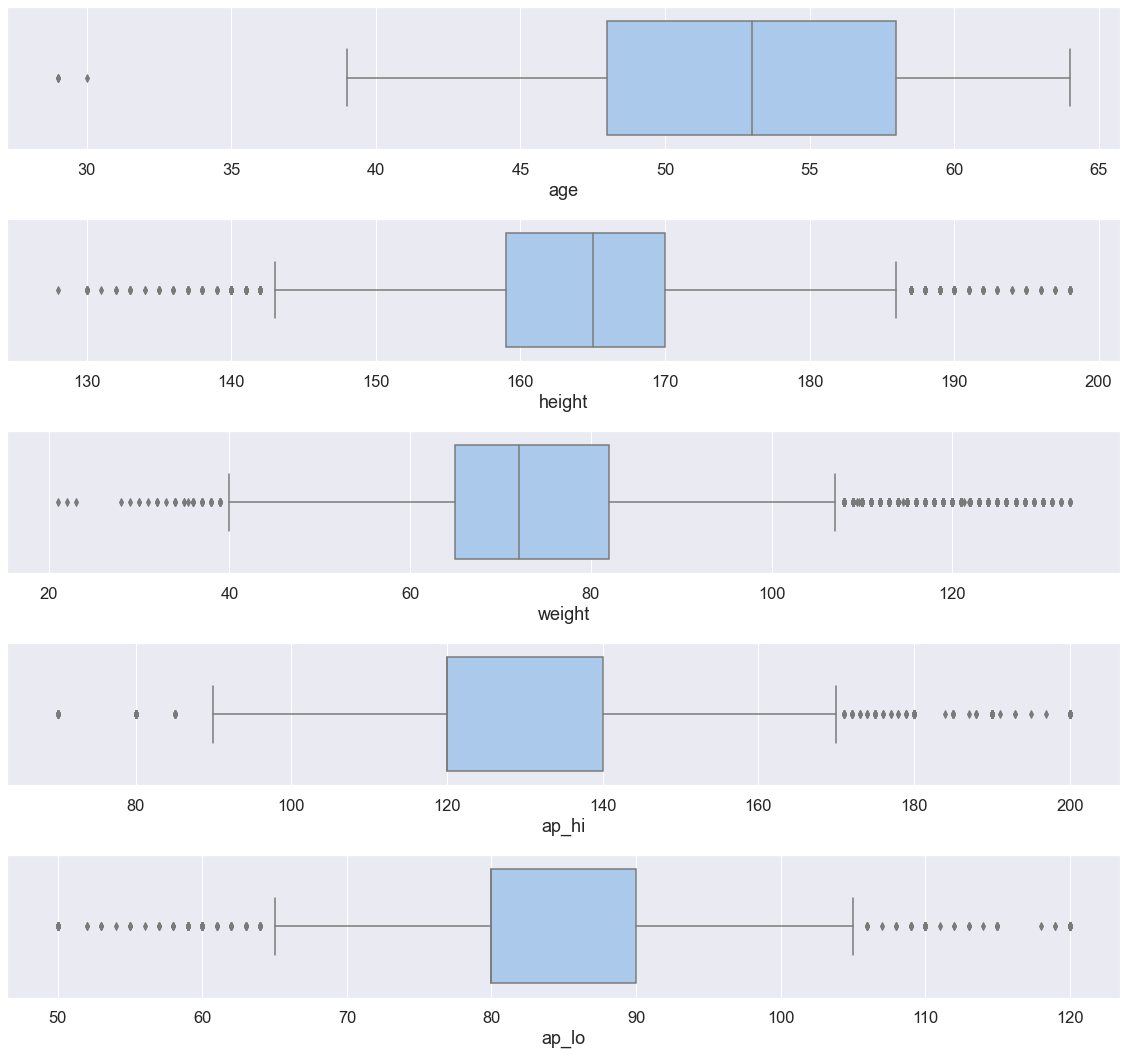

In [34]:
sns.set_context("notebook", font_scale=1.5)
f, axs = plt.subplots(5,1,figsize = (16,15))
sns.boxplot(x=df['age'],ax=axs[0],palette='pastel')
sns.boxplot(x=df['height'],ax=axs[1],palette='pastel')
sns.boxplot(x=df['weight'],ax=axs[2],palette='pastel')
sns.boxplot(x=df['ap_hi'],ax=axs[3],palette='pastel')
sns.boxplot(x=df['ap_lo'],ax=axs[4],palette='pastel')

plt.tight_layout()

<AxesSubplot: >

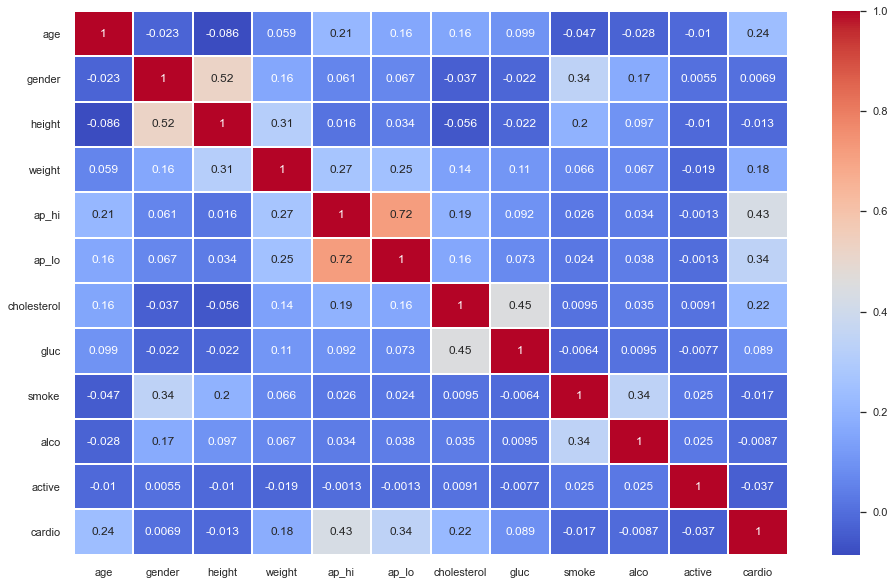

In [35]:
sns.set_context("notebook", font_scale=1)
plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, linewidth=2,cmap='coolwarm')

<AxesSubplot: xlabel='age', ylabel='Count'>

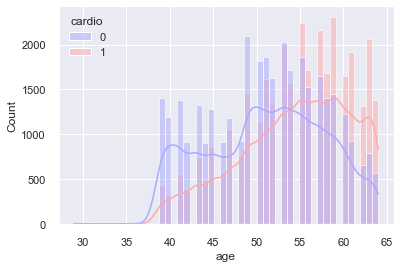

In [36]:
sns.set()
sns.histplot(data=df,x='age',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='height', ylabel='Count'>

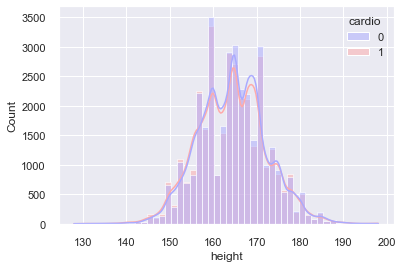

In [37]:
sns.set()
sns.histplot(data=df,x='height',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='weight', ylabel='Count'>

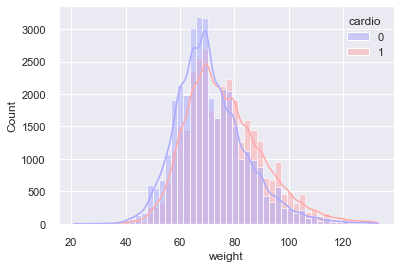

In [38]:
sns.set()
sns.histplot(data=df,x='weight',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='ap_lo', ylabel='Count'>

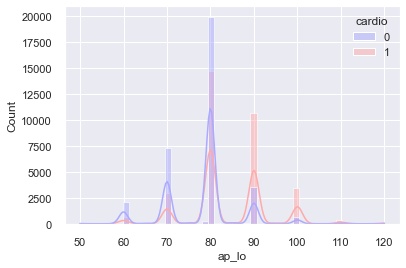

In [39]:
sns.set()
sns.histplot(data=df,x='ap_lo',kde=True,bins=50,hue='cardio',palette='bwr')

<AxesSubplot: xlabel='ap_hi', ylabel='Count'>

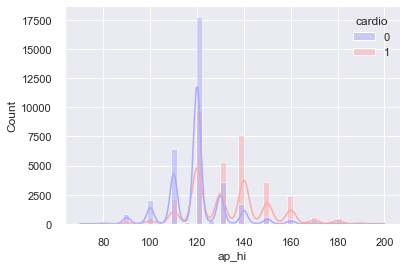

In [40]:
sns.set()
sns.histplot(data=df,x='ap_hi',kde=True,bins=50,hue='cardio',palette='bwr')

In [41]:
#numerical features
numerical = ['age','height' ,'weight', 'ap_hi', 'ap_lo']
#Categorical features
Categorical= ['gender','cholesterol','gluc','smoke','alco','active','cardio']

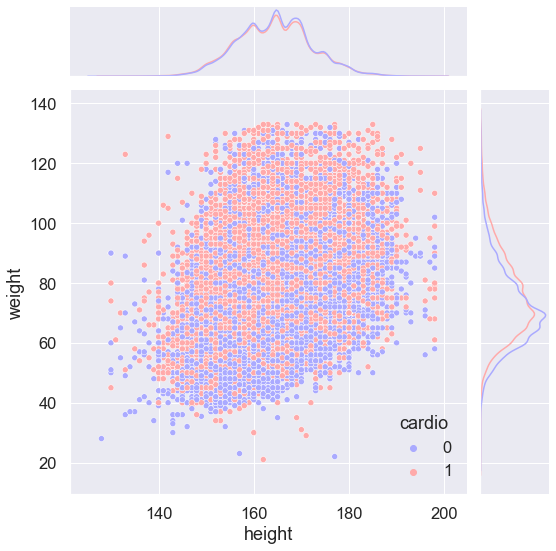

In [42]:
sns.set()
sns.set_context("notebook", font_scale=1.5)
g = sns.JointGrid(data = df, x = 'height', y = 'weight', hue = 'cardio', palette = 'bwr', height = 8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)


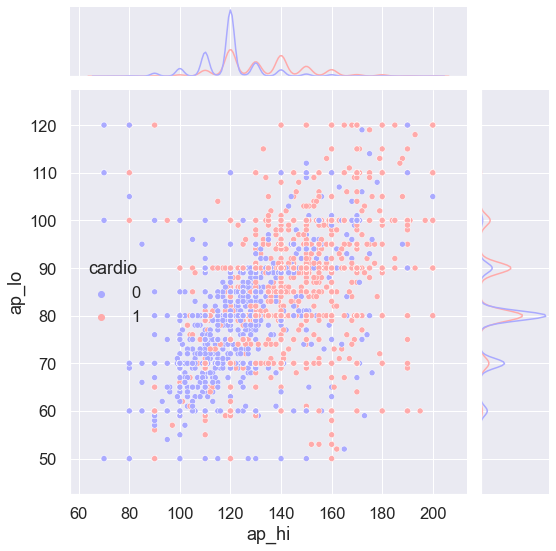

In [43]:
sns.set()
sns.set_context("notebook", font_scale=1.5)
g = sns.JointGrid(data = df, x = 'ap_hi', y = 'ap_lo', hue = 'cardio', palette = 'bwr', height = 8)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [44]:
df['cardio'].value_counts()

0    34619
1    33756
Name: cardio, dtype: int64

In [45]:
df['height'] = df['height']/100

In [46]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68371,52,2,1.68,76.0,120,80,1,1,1,0,1,0
68372,61,1,1.58,126.0,140,90,2,2,0,0,1,1
68373,52,2,1.83,105.0,180,90,3,1,0,1,0,1
68374,61,1,1.63,72.0,135,80,1,2,0,0,0,1


In [47]:
X = df[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
y= df[['cardio']]

In [48]:
X.shape , y.shape 

((68375, 11), (68375, 1))

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

In [50]:
bestfeatures= SelectKBest(score_func=chi2,k=11)
fit= bestfeatures.fit(X,y)

In [51]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

In [52]:
dataScore2 = pd.concat([columns,scores],axis=1)
dataScore2.columns = ['Feature','Score']
dataScore2

,Feature,Score
0,age,3414.668152
1,gender,0.542439
2,height,0.043474
3,weight,5752.759421
4,ap_hi,27106.059803
5,ap_lo,8461.363037
6,cholesterol,1128.981176
7,gluc,144.203457
8,smoke,17.510894
9,alco,4.924292


In [53]:
print(dataScore2.nlargest(11,'Score'))

        Feature         Score
4         ap_hi  27106.059803
5         ap_lo   8461.363037
3        weight   5752.759421
0           age   3414.668152
6   cholesterol   1128.981176
7          gluc    144.203457
10       active     18.745411
8         smoke     17.510894
9          alco      4.924292
1        gender      0.542439
2        height      0.043474


In [54]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [55]:
print(model.feature_importances_)

[0.15720876 0.01066167 0.22727691 0.2473066  0.17859524 0.1020839
 0.0428237  0.01481337 0.00591175 0.00600639 0.00731171]


<AxesSubplot: >

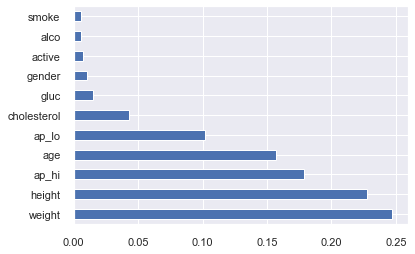

In [56]:
sns.set()
feat_importances_= pd.Series(model.feature_importances_, index=X.columns)
feat_importances_.nlargest(13).plot(kind='barh')

In [57]:
from sklearn.preprocessing import StandardScaler
scale= ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','height',"gender","gluc","smoke","alco","active"]
scaler = StandardScaler()
X[scale] = scaler.fit_transform(X[scale])
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.413353,1.367790,0.456100,-0.861402,-1.002701,-0.136733,-0.536439,-0.394167,-0.310262,-0.237333,0.494693
1,0.325673,-0.731107,-1.074701,0.799252,0.818033,0.936324,2.411799,-0.394167,-0.310262,-0.237333,0.494693
2,-0.265548,-0.731107,0.073400,-0.716997,0.211122,-1.209791,2.411799,-0.394167,-0.310262,-0.237333,-2.021457
3,-0.708963,1.367790,0.583667,0.582645,1.424945,2.009382,-0.536439,-0.394167,-0.310262,-0.237333,0.494693
4,-0.856768,-0.731107,-1.074701,-1.294616,-1.609613,-2.282848,-0.536439,-0.394167,-0.310262,-0.237333,-2.021457


In [58]:
mmscaler = MinMaxScaler()
X[scale] = mmscaler.fit_transform(X[scale])
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.600000,1.0,0.571429,0.366071,0.307692,0.428571,0.0,0.0,0.0,0.0,1.0
1,0.742857,0.0,0.400000,0.571429,0.538462,0.571429,1.0,0.0,0.0,0.0,1.0
2,0.628571,0.0,0.528571,0.383929,0.461538,0.285714,1.0,0.0,0.0,0.0,0.0
3,0.542857,1.0,0.585714,0.544643,0.615385,0.714286,0.0,0.0,0.0,0.0,1.0
4,0.514286,0.0,0.400000,0.312500,0.230769,0.142857,0.0,0.0,0.0,0.0,0.0


In [59]:
X.drop(["gender","gluc","smoke","alco","active"],axis=1,inplace=True)

In [60]:
X

,age,height,weight,ap_hi,ap_lo,cholesterol
0,0.600000,0.571429,0.366071,0.307692,0.428571,0.0
1,0.742857,0.400000,0.571429,0.538462,0.571429,1.0
2,0.628571,0.528571,0.383929,0.461538,0.285714,1.0
3,0.542857,0.585714,0.544643,0.615385,0.714286,0.0
4,0.514286,0.400000,0.312500,0.230769,0.142857,0.0
...,...,...,...,...,...,...
68371,0.657143,0.571429,0.491071,0.384615,0.428571,0.0
68372,0.914286,0.428571,0.937500,0.538462,0.571429,0.5
68373,0.657143,0.785714,0.750000,0.846154,0.571429,1.0
68374,0.914286,0.500000,0.455357,0.500000,0.428571,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42, shuffle = True) 

In [62]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (43760, 6)
X_test shape: (13675, 6)
y_train shape: (43760, 1)
y_test shape: (13675, 1)
X_val shape: (10940, 6)
y val shape: (10940, 1)


In [63]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

def predict_class(model, X_val):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]
    return y_pred, y_prob

def show_summary(model, X_val, y_val):
    y_pred, y_prob = predict_class(model, X_val)
    model.report = classification_report(y_val, y_pred, target_names=["no","yes"])
    print(model.report)


def plot_conf_ROC(model, X_val, y_val):
    y_pred, y_prob = predict_class(model, X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision= precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    cm=confusion_matrix(y_val,y_pred)
    conf=pd.DataFrame(data=cm,columns=['Predicted:NO Cvd','Predicted:CVD'],index=['Actual:No CVD','Actual:CVD'])
    specificity= cm[0,0]/(cm[0,0]+cm[0,1])
    print('Specificity : ', specificity)

    sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
    print('Sensitivity : ', sensitivity)
    

    plt.figure(figsize=(14,7))
    plt.subplot(121)
    sns.heatmap(conf, annot=True, fmt=".0f", square = True,cmap='coolwarm')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Recall Score: {0:.2f}%'.format(100*recall)
    plt.title(all_sample_title, size = 15)
    
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    auc_score = roc_auc_score(y_val, y_prob)

    plt.subplot(122)
    plt.plot(fpr, tpr, color='orange')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title('ROC curve (AUC = {0:.2f}%)'.format(100*auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    


In [64]:
import statsmodels.formula.api as smf
logit_model=smf.logit("cardio~age+height+weight+ap_hi+ap_lo+cholesterol", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.561886
         Iterations 6


In [65]:
print(logit_model.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.189     
Dependent Variable: cardio           AIC:              76851.8851
Date:               2022-11-15 10:20 BIC:              76915.8145
No. Observations:   68375            Log-Likelihood:   -38419.   
Df Model:           6                LL-Null:          -47388.   
Df Residuals:       68368            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     -11.1747   0.2261 -49.4252 0.0000 -11.6178 -10.7315
age             0.0515   0.0014  38.0825 0.0000   0.0489   0.0542
height         -0.6032   0.1199  -5.0307 0.0000  -0.8382  -0.3682
weight          0.0110   0.0007  15.

In [66]:
params = np.exp(logit_model.params)
conf = np.exp(logit_model.conf_int())
conf['OR'] = params
pvalue=round(logit_model.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

             CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Intercept        0.000009       0.000022    0.000014     0.0
age              1.050068       1.055650    1.052856     0.0
height           0.432477       0.691980    0.547051     0.0
weight           1.009635       1.012457    1.011045     0.0
ap_hi            1.055023       1.058834    1.056927     0.0
ap_lo            1.010021       1.015817    1.012915     0.0
cholesterol      1.518185       1.603218    1.560122     0.0


              precision    recall  f1-score   support

          no       0.71      0.79      0.75      5570
         yes       0.75      0.67      0.71      5370

    accuracy                           0.73     10940
   macro avg       0.73      0.73      0.73     10940
weighted avg       0.73      0.73      0.73     10940

Specificity :  0.788689407540395
Sensitivity :  0.6696461824953445


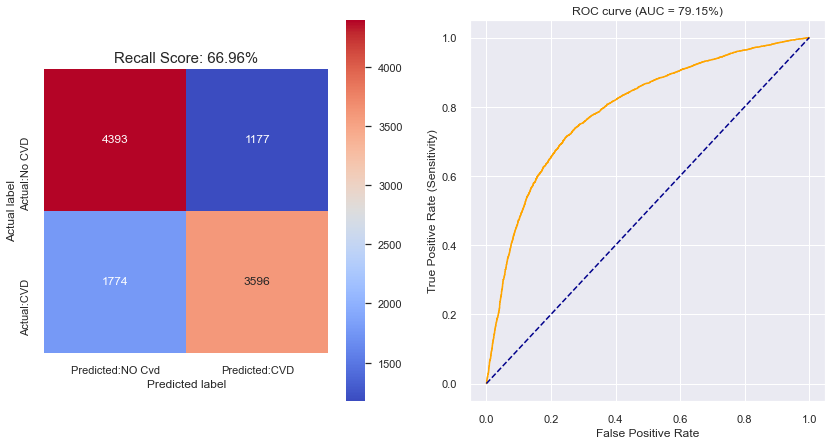

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
show_summary(logreg, X_val, y_val)
plot_conf_ROC(logreg, X_val, y_val)

In [67]:
y_pred_prob=logreg.predict_proba(X_val)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()


,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.081625,0.918375
1,0.662142,0.337858
2,0.143782,0.856218
3,0.306195,0.693805
4,0.646319,0.353681


In [67]:
X_val

,age,height,weight,ap_hi,ap_lo,cholesterol
59536,0.971429,0.557143,0.410714,0.692308,0.714286,0.0
13065,0.914286,0.442857,0.544643,0.307692,0.285714,0.0
44927,0.828571,0.328571,0.294643,0.538462,0.571429,1.0
15393,0.714286,0.600000,0.526786,0.538462,0.571429,0.0
22946,0.628571,0.528571,0.482143,0.384615,0.428571,0.0
...,...,...,...,...,...,...
59667,0.628571,0.457143,0.517857,0.384615,0.428571,0.5
52368,0.685714,0.500000,0.383929,0.384615,0.428571,0.0
48256,0.914286,0.385714,0.392857,0.307692,0.285714,0.0
58397,0.657143,0.442857,0.446429,0.307692,0.285714,0.0


In [139]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)


0.7225594149908592

In [68]:
#penalty — Specify the norm of the penalty.
#C — Inverse of regularization strength; smaller values specify stronger regularization.

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameters : {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

          no       0.71      0.79      0.75      5570
         yes       0.75      0.67      0.71      5370

    accuracy                           0.73     10940
   macro avg       0.73      0.73      0.73     10940
weighted avg       0.73      0.73      0.73     10940

Specificity :  0.7870736086175942
Sensitivity :  0.6705772811918064


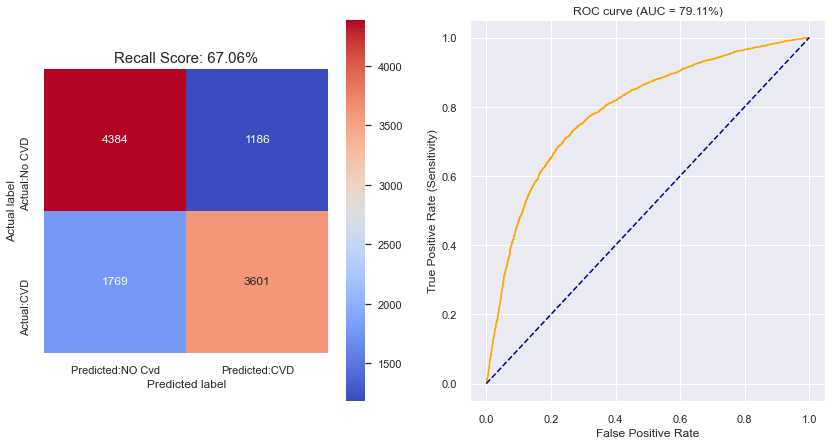

In [69]:
parameters = {'penalty': ('l1', 'l2','elasticnet', 'none'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5)}

logreg= LogisticRegression()
logreg_optimized = GridSearchCV(logreg, param_grid=parameters, n_jobs=-1, verbose=True, cv=5, scoring = 'recall')
logreg_optimized.fit(X_train, y_train)
print("Hyperparameters :", logreg_optimized.best_params_)
show_summary(logreg_optimized, X_val, y_val)
plot_conf_ROC(logreg_optimized, X_val, y_val)



              precision    recall  f1-score   support

          no       0.64      0.68      0.66      5570
         yes       0.64      0.60      0.62      5370

    accuracy                           0.64     10940
   macro avg       0.64      0.64      0.64     10940
weighted avg       0.64      0.64      0.64     10940

Specificity :  0.6766606822262119
Sensitivity :  0.6035381750465549


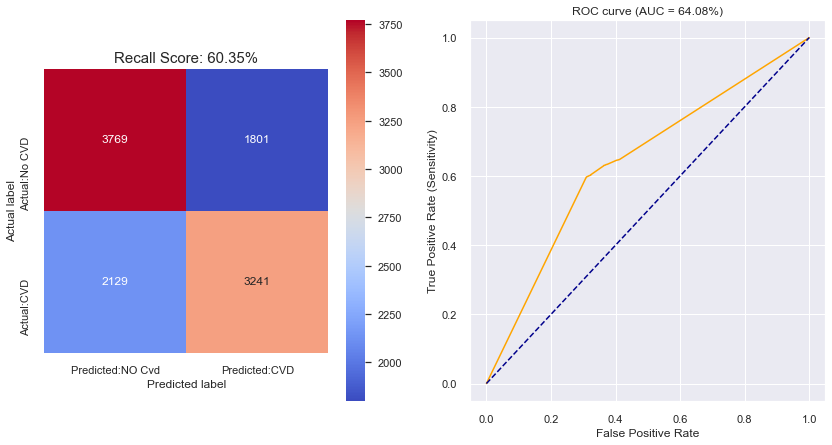

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
show_summary(decision_tree, X_val, y_val)
plot_conf_ROC(decision_tree, X_val, y_val)

In [348]:
param_grid = {'min_samples_leaf': range(1,5),
              'min_samples_split': range(1,10),
              'max_depth': range(1,10)}

grid_search = GridSearchCV(DecisionTreeClassifier(criterion ="entropy",random_state = 42),param_grid=param_grid,cv=5,verbose=True, n_jobs=-1, scoring="accuracy")
grid_search = grid_search.fit(X_train, y_train)
print("Hyperparameters :", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Hyperparameters : {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


              precision    recall  f1-score   support

          no       0.74      0.74      0.74      5570
         yes       0.73      0.73      0.73      5370

    accuracy                           0.73     10940
   macro avg       0.73      0.73      0.73     10940
weighted avg       0.73      0.73      0.73     10940

Specificity :  0.7350089766606822
Sensitivity :  0.7251396648044692


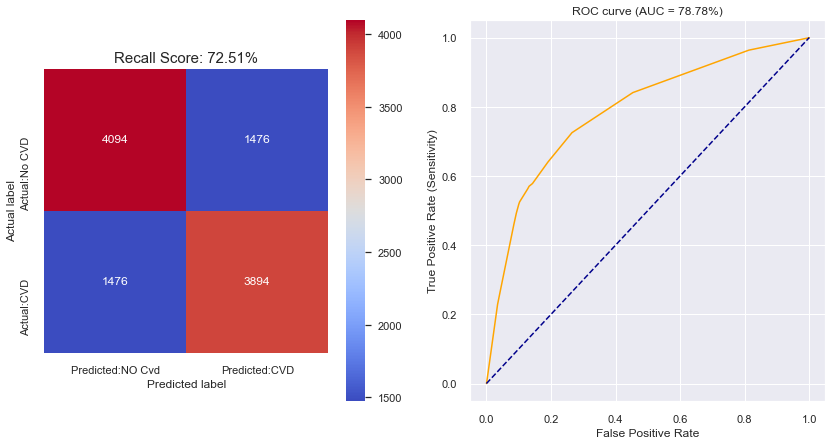

In [71]:
tree_tuned =DecisionTreeClassifier(max_depth=4,min_samples_leaf=1, min_samples_split=2,random_state = 42)
tree_tuned = tree_tuned.fit(X_train, y_train)
show_summary(tree_tuned, X_val, y_val)
plot_conf_ROC(tree_tuned, X_val, y_val)

In [72]:
y_pred = tree_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7206581352833638

              precision    recall  f1-score   support

          no       0.70      0.71      0.71      5570
         yes       0.70      0.69      0.69      5370

    accuracy                           0.70     10940
   macro avg       0.70      0.70      0.70     10940
weighted avg       0.70      0.70      0.70     10940

Specificity :  0.7134649910233393
Sensitivity :  0.6884543761638734


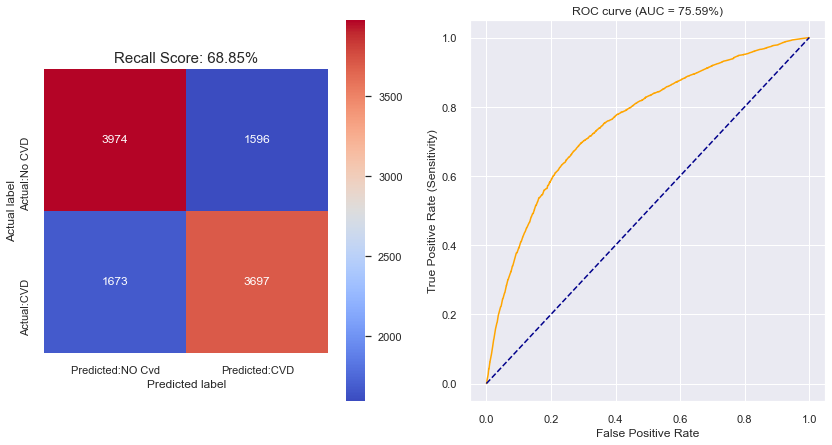

In [86]:
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
show_summary(forest, X_val, y_val)
plot_conf_ROC(forest, X_val, y_val)


In [485]:
param_grid = {'min_samples_leaf': range(1,5),
              'min_samples_split': range(1,10),
              'max_depth': range(1,45)}
forest_tuned=RandomForestClassifier(criterion = "entropy")
grid_search = GridSearchCV(forest_tuned,param_grid=param_grid,scoring="accuracy",n_jobs = -1,cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


              precision    recall  f1-score   support

          no       0.70      0.71      0.71      5570
         yes       0.69      0.68      0.69      5370

    accuracy                           0.70     10940
   macro avg       0.70      0.70      0.70     10940
weighted avg       0.70      0.70      0.70     10940

Specificity :  0.7100538599640933
Sensitivity :  0.6847299813780261


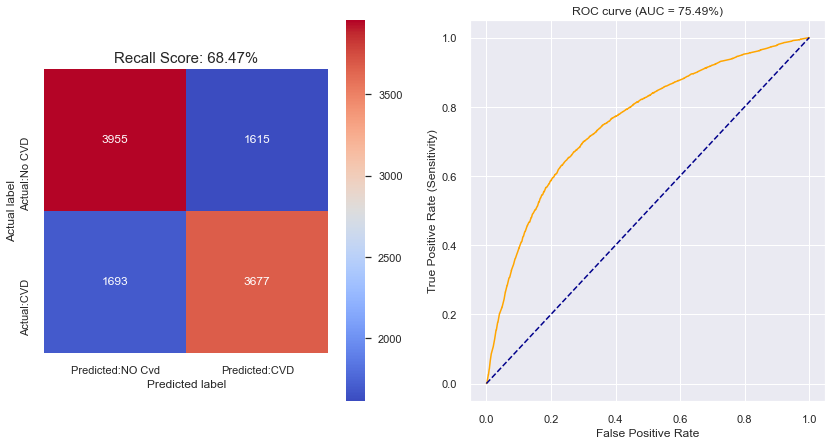

In [75]:
forest_tuned = RandomForestClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=2,criterion = "entropy",random_state = 42,n_jobs = -1)
forest_tuned= forest.fit(X_train, y_train)
show_summary(forest_tuned, X_val, y_val)
plot_conf_ROC(forest_tuned, X_val, y_val)

In [147]:
y_pred = forest_tuned .predict(X_test)
accuracy_score(y_test, y_pred)

0.7021572212065813

              precision    recall  f1-score   support

          no       0.70      0.71      0.71      5570
         yes       0.70      0.68      0.69      5370

    accuracy                           0.70     10940
   macro avg       0.70      0.70      0.70     10940
weighted avg       0.70      0.70      0.70     10940

Specificity :  0.7138240574506284
Sensitivity :  0.6800744878957169


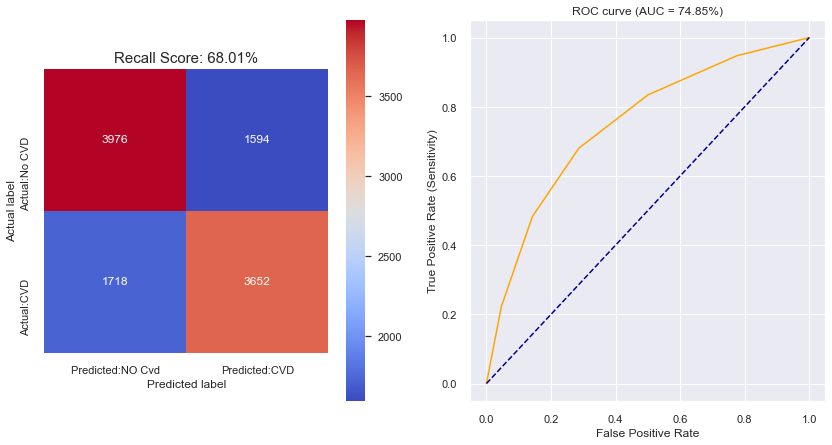

In [148]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
show_summary(knn, X_val, y_val)
plot_conf_ROC(knn, X_val, y_val)

In [484]:
knn = KNeighborsClassifier()
k_range = list(range(1, 300))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 299 candidates, totalling 2990 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.644 total time=   0.2s
[CV 2/10] END ....................n_neighbors=1;, score=0.636 total time=   0.2s
[CV 3/10] END ....................n_neighbors=1;, score=0.636 total time=   0.2s
[CV 4/10] END ....................n_neighbors=1;, score=0.640 total time=   0.2s
[CV 5/10] END ....................n_neighbors=1;, score=0.629 total time=   0.2s
[CV 6/10] END ....................n_neighbors=1;, score=0.624 total time=   0.2s
[CV 7/10] END ....................n_neighbors=1;, score=0.647 total time=   0.2s
[CV 8/10] END ....................n_neighbors=1;, score=0.632 total time=   0.2s
[CV 9/10] END ....................n_neighbors=1;, score=0.634 total time=   0.2s
[CV 10/10] END ...................n_neighbors=1;, score=0.639 total time=   0.2s
[CV 1/10] END ....................n_neighbors=2;, score=0.646 total time=   0.2s
[CV 2/10] END ....................n_neighbor

[CV 2/10] END ...................n_neighbors=11;, score=0.708 total time=   0.2s
[CV 3/10] END ...................n_neighbors=11;, score=0.706 total time=   0.3s
[CV 4/10] END ...................n_neighbors=11;, score=0.710 total time=   0.2s
[CV 5/10] END ...................n_neighbors=11;, score=0.718 total time=   0.3s
[CV 6/10] END ...................n_neighbors=11;, score=0.713 total time=   0.3s
[CV 7/10] END ...................n_neighbors=11;, score=0.715 total time=   0.2s
[CV 8/10] END ...................n_neighbors=11;, score=0.703 total time=   0.3s
[CV 9/10] END ...................n_neighbors=11;, score=0.720 total time=   0.2s
[CV 10/10] END ..................n_neighbors=11;, score=0.706 total time=   0.3s
[CV 1/10] END ...................n_neighbors=12;, score=0.720 total time=   0.3s
[CV 2/10] END ...................n_neighbors=12;, score=0.708 total time=   0.2s
[CV 3/10] END ...................n_neighbors=12;, score=0.711 total time=   0.3s
[CV 4/10] END ..............

[CV 4/10] END ...................n_neighbors=21;, score=0.712 total time=   0.3s
[CV 5/10] END ...................n_neighbors=21;, score=0.724 total time=   0.3s
[CV 6/10] END ...................n_neighbors=21;, score=0.723 total time=   0.3s
[CV 7/10] END ...................n_neighbors=21;, score=0.724 total time=   0.3s
[CV 8/10] END ...................n_neighbors=21;, score=0.707 total time=   0.3s
[CV 9/10] END ...................n_neighbors=21;, score=0.727 total time=   0.3s
[CV 10/10] END ..................n_neighbors=21;, score=0.730 total time=   0.3s
[CV 1/10] END ...................n_neighbors=22;, score=0.725 total time=   0.3s
[CV 2/10] END ...................n_neighbors=22;, score=0.712 total time=   0.3s
[CV 3/10] END ...................n_neighbors=22;, score=0.718 total time=   0.3s
[CV 4/10] END ...................n_neighbors=22;, score=0.713 total time=   0.3s
[CV 5/10] END ...................n_neighbors=22;, score=0.726 total time=   0.3s
[CV 6/10] END ..............

[CV 6/10] END ...................n_neighbors=31;, score=0.728 total time=   0.3s
[CV 7/10] END ...................n_neighbors=31;, score=0.730 total time=   0.3s
[CV 8/10] END ...................n_neighbors=31;, score=0.714 total time=   0.3s
[CV 9/10] END ...................n_neighbors=31;, score=0.732 total time=   0.3s
[CV 10/10] END ..................n_neighbors=31;, score=0.728 total time=   0.3s
[CV 1/10] END ...................n_neighbors=32;, score=0.726 total time=   0.3s
[CV 2/10] END ...................n_neighbors=32;, score=0.713 total time=   0.3s
[CV 3/10] END ...................n_neighbors=32;, score=0.724 total time=   0.3s
[CV 4/10] END ...................n_neighbors=32;, score=0.719 total time=   0.3s
[CV 5/10] END ...................n_neighbors=32;, score=0.734 total time=   0.3s
[CV 6/10] END ...................n_neighbors=32;, score=0.727 total time=   0.4s
[CV 7/10] END ...................n_neighbors=32;, score=0.731 total time=   0.3s
[CV 8/10] END ..............

[CV 8/10] END ...................n_neighbors=41;, score=0.719 total time=   0.3s
[CV 9/10] END ...................n_neighbors=41;, score=0.734 total time=   0.3s
[CV 10/10] END ..................n_neighbors=41;, score=0.731 total time=   0.3s
[CV 1/10] END ...................n_neighbors=42;, score=0.727 total time=   0.3s
[CV 2/10] END ...................n_neighbors=42;, score=0.718 total time=   0.3s
[CV 3/10] END ...................n_neighbors=42;, score=0.727 total time=   0.3s
[CV 4/10] END ...................n_neighbors=42;, score=0.722 total time=   0.3s
[CV 5/10] END ...................n_neighbors=42;, score=0.733 total time=   0.3s
[CV 6/10] END ...................n_neighbors=42;, score=0.730 total time=   0.3s
[CV 7/10] END ...................n_neighbors=42;, score=0.735 total time=   0.3s
[CV 8/10] END ...................n_neighbors=42;, score=0.719 total time=   0.3s
[CV 9/10] END ...................n_neighbors=42;, score=0.734 total time=   0.3s
[CV 10/10] END .............

[CV 10/10] END ..................n_neighbors=51;, score=0.731 total time=   0.4s
[CV 1/10] END ...................n_neighbors=52;, score=0.729 total time=   0.3s
[CV 2/10] END ...................n_neighbors=52;, score=0.718 total time=   0.4s
[CV 3/10] END ...................n_neighbors=52;, score=0.729 total time=   0.4s
[CV 4/10] END ...................n_neighbors=52;, score=0.724 total time=   0.4s
[CV 5/10] END ...................n_neighbors=52;, score=0.734 total time=   0.4s
[CV 6/10] END ...................n_neighbors=52;, score=0.730 total time=   1.6s
[CV 7/10] END ...................n_neighbors=52;, score=0.734 total time=   0.4s
[CV 8/10] END ...................n_neighbors=52;, score=0.717 total time=   0.4s
[CV 9/10] END ...................n_neighbors=52;, score=0.735 total time=   0.4s
[CV 10/10] END ..................n_neighbors=52;, score=0.734 total time=   0.4s
[CV 1/10] END ...................n_neighbors=53;, score=0.728 total time=   0.4s
[CV 2/10] END ..............

[CV 2/10] END ...................n_neighbors=62;, score=0.720 total time=   0.4s
[CV 3/10] END ...................n_neighbors=62;, score=0.730 total time=   0.4s
[CV 4/10] END ...................n_neighbors=62;, score=0.723 total time=   0.4s
[CV 5/10] END ...................n_neighbors=62;, score=0.735 total time=   0.4s
[CV 6/10] END ...................n_neighbors=62;, score=0.732 total time=   0.4s
[CV 7/10] END ...................n_neighbors=62;, score=0.735 total time=   0.4s
[CV 8/10] END ...................n_neighbors=62;, score=0.716 total time=   0.4s
[CV 9/10] END ...................n_neighbors=62;, score=0.736 total time=   0.4s
[CV 10/10] END ..................n_neighbors=62;, score=0.732 total time=   0.4s
[CV 1/10] END ...................n_neighbors=63;, score=0.729 total time=   0.4s
[CV 2/10] END ...................n_neighbors=63;, score=0.718 total time=   0.4s
[CV 3/10] END ...................n_neighbors=63;, score=0.729 total time=   0.4s
[CV 4/10] END ..............

[CV 4/10] END ...................n_neighbors=72;, score=0.726 total time=   0.4s
[CV 5/10] END ...................n_neighbors=72;, score=0.738 total time=   0.4s
[CV 6/10] END ...................n_neighbors=72;, score=0.733 total time=   0.4s
[CV 7/10] END ...................n_neighbors=72;, score=0.736 total time=   0.4s
[CV 8/10] END ...................n_neighbors=72;, score=0.718 total time=   0.4s
[CV 9/10] END ...................n_neighbors=72;, score=0.734 total time=   0.4s
[CV 10/10] END ..................n_neighbors=72;, score=0.731 total time=   0.4s
[CV 1/10] END ...................n_neighbors=73;, score=0.727 total time=   0.4s
[CV 2/10] END ...................n_neighbors=73;, score=0.718 total time=   0.4s
[CV 3/10] END ...................n_neighbors=73;, score=0.730 total time=   0.4s
[CV 4/10] END ...................n_neighbors=73;, score=0.726 total time=   0.4s
[CV 5/10] END ...................n_neighbors=73;, score=0.738 total time=   0.4s
[CV 6/10] END ..............

[CV 6/10] END ...................n_neighbors=82;, score=0.734 total time=   0.4s
[CV 7/10] END ...................n_neighbors=82;, score=0.738 total time=   0.4s
[CV 8/10] END ...................n_neighbors=82;, score=0.718 total time=   0.4s
[CV 9/10] END ...................n_neighbors=82;, score=0.734 total time=   0.5s
[CV 10/10] END ..................n_neighbors=82;, score=0.731 total time=   0.4s
[CV 1/10] END ...................n_neighbors=83;, score=0.725 total time=   0.4s
[CV 2/10] END ...................n_neighbors=83;, score=0.719 total time=   0.4s
[CV 3/10] END ...................n_neighbors=83;, score=0.731 total time=   0.4s
[CV 4/10] END ...................n_neighbors=83;, score=0.726 total time=   0.4s
[CV 5/10] END ...................n_neighbors=83;, score=0.738 total time=   0.4s
[CV 6/10] END ...................n_neighbors=83;, score=0.734 total time=   0.4s
[CV 7/10] END ...................n_neighbors=83;, score=0.735 total time=   0.4s
[CV 8/10] END ..............

[CV 8/10] END ...................n_neighbors=92;, score=0.719 total time=   0.4s
[CV 9/10] END ...................n_neighbors=92;, score=0.735 total time=   0.4s
[CV 10/10] END ..................n_neighbors=92;, score=0.734 total time=   0.5s
[CV 1/10] END ...................n_neighbors=93;, score=0.726 total time=   0.4s
[CV 2/10] END ...................n_neighbors=93;, score=0.719 total time=   0.4s
[CV 3/10] END ...................n_neighbors=93;, score=0.730 total time=   0.4s
[CV 4/10] END ...................n_neighbors=93;, score=0.729 total time=   0.4s
[CV 5/10] END ...................n_neighbors=93;, score=0.740 total time=   0.4s
[CV 6/10] END ...................n_neighbors=93;, score=0.734 total time=   0.4s
[CV 7/10] END ...................n_neighbors=93;, score=0.735 total time=   0.4s
[CV 8/10] END ...................n_neighbors=93;, score=0.718 total time=   0.5s
[CV 9/10] END ...................n_neighbors=93;, score=0.733 total time=   0.4s
[CV 10/10] END .............

[CV 10/10] END .................n_neighbors=102;, score=0.734 total time=   0.5s
[CV 1/10] END ..................n_neighbors=103;, score=0.728 total time=   0.5s
[CV 2/10] END ..................n_neighbors=103;, score=0.722 total time=   0.5s
[CV 3/10] END ..................n_neighbors=103;, score=0.729 total time=   0.5s
[CV 4/10] END ..................n_neighbors=103;, score=0.725 total time=   0.5s
[CV 5/10] END ..................n_neighbors=103;, score=0.740 total time=   0.5s
[CV 6/10] END ..................n_neighbors=103;, score=0.733 total time=   0.5s
[CV 7/10] END ..................n_neighbors=103;, score=0.736 total time=   0.5s
[CV 8/10] END ..................n_neighbors=103;, score=0.719 total time=   0.5s
[CV 9/10] END ..................n_neighbors=103;, score=0.731 total time=   0.5s
[CV 10/10] END .................n_neighbors=103;, score=0.732 total time=   0.5s
[CV 1/10] END ..................n_neighbors=104;, score=0.730 total time=   0.5s
[CV 2/10] END ..............

[CV 2/10] END ..................n_neighbors=113;, score=0.721 total time=   0.4s
[CV 3/10] END ..................n_neighbors=113;, score=0.729 total time=   0.4s
[CV 4/10] END ..................n_neighbors=113;, score=0.726 total time=   0.5s
[CV 5/10] END ..................n_neighbors=113;, score=0.741 total time=   0.4s
[CV 6/10] END ..................n_neighbors=113;, score=0.734 total time=   0.4s
[CV 7/10] END ..................n_neighbors=113;, score=0.738 total time=   0.4s
[CV 8/10] END ..................n_neighbors=113;, score=0.717 total time=   0.4s
[CV 9/10] END ..................n_neighbors=113;, score=0.734 total time=   0.4s
[CV 10/10] END .................n_neighbors=113;, score=0.733 total time=   0.5s
[CV 1/10] END ..................n_neighbors=114;, score=0.729 total time=   0.5s
[CV 2/10] END ..................n_neighbors=114;, score=0.721 total time=   0.5s
[CV 3/10] END ..................n_neighbors=114;, score=0.729 total time=   0.5s
[CV 4/10] END ..............

[CV 4/10] END ..................n_neighbors=123;, score=0.726 total time=   0.5s
[CV 5/10] END ..................n_neighbors=123;, score=0.739 total time=   0.6s
[CV 6/10] END ..................n_neighbors=123;, score=0.731 total time=   0.5s
[CV 7/10] END ..................n_neighbors=123;, score=0.738 total time=   0.5s
[CV 8/10] END ..................n_neighbors=123;, score=0.717 total time=   0.5s
[CV 9/10] END ..................n_neighbors=123;, score=0.734 total time=   0.5s
[CV 10/10] END .................n_neighbors=123;, score=0.736 total time=   0.5s
[CV 1/10] END ..................n_neighbors=124;, score=0.730 total time=   0.5s
[CV 2/10] END ..................n_neighbors=124;, score=0.719 total time=   0.5s
[CV 3/10] END ..................n_neighbors=124;, score=0.730 total time=   0.5s
[CV 4/10] END ..................n_neighbors=124;, score=0.726 total time=   0.5s
[CV 5/10] END ..................n_neighbors=124;, score=0.739 total time=   0.5s
[CV 6/10] END ..............

[CV 6/10] END ..................n_neighbors=133;, score=0.733 total time=   0.5s
[CV 7/10] END ..................n_neighbors=133;, score=0.739 total time=   0.5s
[CV 8/10] END ..................n_neighbors=133;, score=0.716 total time=   0.5s
[CV 9/10] END ..................n_neighbors=133;, score=0.735 total time=   0.5s
[CV 10/10] END .................n_neighbors=133;, score=0.736 total time=   0.5s
[CV 1/10] END ..................n_neighbors=134;, score=0.730 total time=   0.5s
[CV 2/10] END ..................n_neighbors=134;, score=0.718 total time=   0.5s
[CV 3/10] END ..................n_neighbors=134;, score=0.730 total time=   0.5s
[CV 4/10] END ..................n_neighbors=134;, score=0.725 total time=   0.5s
[CV 5/10] END ..................n_neighbors=134;, score=0.737 total time=   0.5s
[CV 6/10] END ..................n_neighbors=134;, score=0.732 total time=   0.5s
[CV 7/10] END ..................n_neighbors=134;, score=0.739 total time=   0.5s
[CV 8/10] END ..............

[CV 8/10] END ..................n_neighbors=143;, score=0.716 total time=   0.5s
[CV 9/10] END ..................n_neighbors=143;, score=0.735 total time=   0.5s
[CV 10/10] END .................n_neighbors=143;, score=0.736 total time=   0.5s
[CV 1/10] END ..................n_neighbors=144;, score=0.730 total time=   0.5s
[CV 2/10] END ..................n_neighbors=144;, score=0.716 total time=   0.5s
[CV 3/10] END ..................n_neighbors=144;, score=0.731 total time=   0.5s
[CV 4/10] END ..................n_neighbors=144;, score=0.724 total time=   0.5s
[CV 5/10] END ..................n_neighbors=144;, score=0.739 total time=   0.5s
[CV 6/10] END ..................n_neighbors=144;, score=0.730 total time=   0.5s
[CV 7/10] END ..................n_neighbors=144;, score=0.737 total time=   0.5s
[CV 8/10] END ..................n_neighbors=144;, score=0.715 total time=   0.5s
[CV 9/10] END ..................n_neighbors=144;, score=0.735 total time=   0.6s
[CV 10/10] END .............

[CV 10/10] END .................n_neighbors=153;, score=0.735 total time=   0.5s
[CV 1/10] END ..................n_neighbors=154;, score=0.730 total time=   0.5s
[CV 2/10] END ..................n_neighbors=154;, score=0.719 total time=   0.5s
[CV 3/10] END ..................n_neighbors=154;, score=0.730 total time=   0.5s
[CV 4/10] END ..................n_neighbors=154;, score=0.726 total time=   0.5s
[CV 5/10] END ..................n_neighbors=154;, score=0.739 total time=   0.5s
[CV 6/10] END ..................n_neighbors=154;, score=0.733 total time=   0.5s
[CV 7/10] END ..................n_neighbors=154;, score=0.734 total time=   0.5s
[CV 8/10] END ..................n_neighbors=154;, score=0.717 total time=   0.5s
[CV 9/10] END ..................n_neighbors=154;, score=0.735 total time=   0.5s
[CV 10/10] END .................n_neighbors=154;, score=0.735 total time=   0.5s
[CV 1/10] END ..................n_neighbors=155;, score=0.731 total time=   0.5s
[CV 2/10] END ..............

[CV 2/10] END ..................n_neighbors=164;, score=0.718 total time=   0.5s
[CV 3/10] END ..................n_neighbors=164;, score=0.731 total time=   0.5s
[CV 4/10] END ..................n_neighbors=164;, score=0.726 total time=   0.5s
[CV 5/10] END ..................n_neighbors=164;, score=0.739 total time=   0.6s
[CV 6/10] END ..................n_neighbors=164;, score=0.732 total time=   0.5s
[CV 7/10] END ..................n_neighbors=164;, score=0.736 total time=   0.5s
[CV 8/10] END ..................n_neighbors=164;, score=0.715 total time=   0.6s
[CV 9/10] END ..................n_neighbors=164;, score=0.734 total time=   0.5s
[CV 10/10] END .................n_neighbors=164;, score=0.736 total time=   0.5s
[CV 1/10] END ..................n_neighbors=165;, score=0.731 total time=   0.5s
[CV 2/10] END ..................n_neighbors=165;, score=0.718 total time=   0.5s
[CV 3/10] END ..................n_neighbors=165;, score=0.730 total time=   0.5s
[CV 4/10] END ..............

[CV 4/10] END ..................n_neighbors=174;, score=0.726 total time=   0.6s
[CV 5/10] END ..................n_neighbors=174;, score=0.740 total time=   0.6s
[CV 6/10] END ..................n_neighbors=174;, score=0.732 total time=   0.6s
[CV 7/10] END ..................n_neighbors=174;, score=0.736 total time=   0.6s
[CV 8/10] END ..................n_neighbors=174;, score=0.715 total time=   0.6s
[CV 9/10] END ..................n_neighbors=174;, score=0.732 total time=   0.6s
[CV 10/10] END .................n_neighbors=174;, score=0.736 total time=   0.6s
[CV 1/10] END ..................n_neighbors=175;, score=0.730 total time=   0.6s
[CV 2/10] END ..................n_neighbors=175;, score=0.718 total time=   0.6s
[CV 3/10] END ..................n_neighbors=175;, score=0.731 total time=   0.6s
[CV 4/10] END ..................n_neighbors=175;, score=0.726 total time=   0.6s
[CV 5/10] END ..................n_neighbors=175;, score=0.739 total time=   0.6s
[CV 6/10] END ..............

[CV 6/10] END ..................n_neighbors=184;, score=0.730 total time=   0.6s
[CV 7/10] END ..................n_neighbors=184;, score=0.736 total time=   0.6s
[CV 8/10] END ..................n_neighbors=184;, score=0.715 total time=   0.6s
[CV 9/10] END ..................n_neighbors=184;, score=0.735 total time=   0.6s
[CV 10/10] END .................n_neighbors=184;, score=0.735 total time=   0.6s
[CV 1/10] END ..................n_neighbors=185;, score=0.731 total time=   0.6s
[CV 2/10] END ..................n_neighbors=185;, score=0.718 total time=   0.6s
[CV 3/10] END ..................n_neighbors=185;, score=0.731 total time=   0.6s
[CV 4/10] END ..................n_neighbors=185;, score=0.727 total time=   0.6s
[CV 5/10] END ..................n_neighbors=185;, score=0.740 total time=   0.6s
[CV 6/10] END ..................n_neighbors=185;, score=0.731 total time=   0.6s
[CV 7/10] END ..................n_neighbors=185;, score=0.737 total time=   0.6s
[CV 8/10] END ..............

[CV 8/10] END ..................n_neighbors=194;, score=0.716 total time=   0.6s
[CV 9/10] END ..................n_neighbors=194;, score=0.736 total time=   0.6s
[CV 10/10] END .................n_neighbors=194;, score=0.734 total time=   0.6s
[CV 1/10] END ..................n_neighbors=195;, score=0.731 total time=   0.6s
[CV 2/10] END ..................n_neighbors=195;, score=0.718 total time=   0.8s
[CV 3/10] END ..................n_neighbors=195;, score=0.733 total time=   0.7s
[CV 4/10] END ..................n_neighbors=195;, score=0.728 total time=   0.6s
[CV 5/10] END ..................n_neighbors=195;, score=0.739 total time=   0.6s
[CV 6/10] END ..................n_neighbors=195;, score=0.731 total time=   0.7s
[CV 7/10] END ..................n_neighbors=195;, score=0.736 total time=   1.0s
[CV 8/10] END ..................n_neighbors=195;, score=0.717 total time=   0.6s
[CV 9/10] END ..................n_neighbors=195;, score=0.734 total time=   0.6s
[CV 10/10] END .............

[CV 10/10] END .................n_neighbors=204;, score=0.734 total time=   0.6s
[CV 1/10] END ..................n_neighbors=205;, score=0.733 total time=   0.6s
[CV 2/10] END ..................n_neighbors=205;, score=0.718 total time=   0.6s
[CV 3/10] END ..................n_neighbors=205;, score=0.732 total time=   0.6s
[CV 4/10] END ..................n_neighbors=205;, score=0.728 total time=   0.6s
[CV 5/10] END ..................n_neighbors=205;, score=0.739 total time=   0.6s
[CV 6/10] END ..................n_neighbors=205;, score=0.730 total time=   0.6s
[CV 7/10] END ..................n_neighbors=205;, score=0.738 total time=   0.6s
[CV 8/10] END ..................n_neighbors=205;, score=0.716 total time=   0.6s
[CV 9/10] END ..................n_neighbors=205;, score=0.734 total time=   0.6s
[CV 10/10] END .................n_neighbors=205;, score=0.734 total time=   0.6s
[CV 1/10] END ..................n_neighbors=206;, score=0.732 total time=   0.6s
[CV 2/10] END ..............

[CV 2/10] END ..................n_neighbors=215;, score=0.719 total time=   0.6s
[CV 3/10] END ..................n_neighbors=215;, score=0.733 total time=   0.6s
[CV 4/10] END ..................n_neighbors=215;, score=0.729 total time=   0.6s
[CV 5/10] END ..................n_neighbors=215;, score=0.738 total time=   0.6s
[CV 6/10] END ..................n_neighbors=215;, score=0.729 total time=   0.6s
[CV 7/10] END ..................n_neighbors=215;, score=0.738 total time=   0.6s
[CV 8/10] END ..................n_neighbors=215;, score=0.717 total time=   0.6s
[CV 9/10] END ..................n_neighbors=215;, score=0.735 total time=   0.6s
[CV 10/10] END .................n_neighbors=215;, score=0.734 total time=   0.6s
[CV 1/10] END ..................n_neighbors=216;, score=0.731 total time=   0.6s
[CV 2/10] END ..................n_neighbors=216;, score=0.719 total time=   0.6s
[CV 3/10] END ..................n_neighbors=216;, score=0.732 total time=   0.6s
[CV 4/10] END ..............

[CV 4/10] END ..................n_neighbors=225;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=225;, score=0.738 total time=   0.7s
[CV 6/10] END ..................n_neighbors=225;, score=0.729 total time=   0.7s
[CV 7/10] END ..................n_neighbors=225;, score=0.738 total time=   0.6s
[CV 8/10] END ..................n_neighbors=225;, score=0.716 total time=   0.7s
[CV 9/10] END ..................n_neighbors=225;, score=0.734 total time=   0.7s
[CV 10/10] END .................n_neighbors=225;, score=0.734 total time=   0.7s
[CV 1/10] END ..................n_neighbors=226;, score=0.731 total time=   0.7s
[CV 2/10] END ..................n_neighbors=226;, score=0.718 total time=   0.7s
[CV 3/10] END ..................n_neighbors=226;, score=0.733 total time=   0.7s
[CV 4/10] END ..................n_neighbors=226;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=226;, score=0.738 total time=   0.7s
[CV 6/10] END ..............

[CV 6/10] END ..................n_neighbors=235;, score=0.729 total time=   0.6s
[CV 7/10] END ..................n_neighbors=235;, score=0.737 total time=   0.7s
[CV 8/10] END ..................n_neighbors=235;, score=0.715 total time=   0.6s
[CV 9/10] END ..................n_neighbors=235;, score=0.734 total time=   0.6s
[CV 10/10] END .................n_neighbors=235;, score=0.734 total time=   0.6s
[CV 1/10] END ..................n_neighbors=236;, score=0.732 total time=   0.6s
[CV 2/10] END ..................n_neighbors=236;, score=0.719 total time=   0.6s
[CV 3/10] END ..................n_neighbors=236;, score=0.732 total time=   0.6s
[CV 4/10] END ..................n_neighbors=236;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=236;, score=0.738 total time=   0.6s
[CV 6/10] END ..................n_neighbors=236;, score=0.728 total time=   0.7s
[CV 7/10] END ..................n_neighbors=236;, score=0.736 total time=   0.6s
[CV 8/10] END ..............

[CV 8/10] END ..................n_neighbors=245;, score=0.715 total time=   0.7s
[CV 9/10] END ..................n_neighbors=245;, score=0.733 total time=   0.7s
[CV 10/10] END .................n_neighbors=245;, score=0.734 total time=   0.7s
[CV 1/10] END ..................n_neighbors=246;, score=0.731 total time=   0.7s
[CV 2/10] END ..................n_neighbors=246;, score=0.720 total time=   0.7s
[CV 3/10] END ..................n_neighbors=246;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=246;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=246;, score=0.739 total time=   0.7s
[CV 6/10] END ..................n_neighbors=246;, score=0.728 total time=   0.7s
[CV 7/10] END ..................n_neighbors=246;, score=0.736 total time=   0.7s
[CV 8/10] END ..................n_neighbors=246;, score=0.716 total time=   0.7s
[CV 9/10] END ..................n_neighbors=246;, score=0.734 total time=   0.7s
[CV 10/10] END .............

[CV 10/10] END .................n_neighbors=255;, score=0.734 total time=   0.7s
[CV 1/10] END ..................n_neighbors=256;, score=0.732 total time=   0.7s
[CV 2/10] END ..................n_neighbors=256;, score=0.720 total time=   0.7s
[CV 3/10] END ..................n_neighbors=256;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=256;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=256;, score=0.740 total time=   0.7s
[CV 6/10] END ..................n_neighbors=256;, score=0.729 total time=   0.7s
[CV 7/10] END ..................n_neighbors=256;, score=0.736 total time=   0.7s
[CV 8/10] END ..................n_neighbors=256;, score=0.715 total time=   0.7s
[CV 9/10] END ..................n_neighbors=256;, score=0.732 total time=   0.7s
[CV 10/10] END .................n_neighbors=256;, score=0.734 total time=   0.7s
[CV 1/10] END ..................n_neighbors=257;, score=0.732 total time=   0.7s
[CV 2/10] END ..............

[CV 2/10] END ..................n_neighbors=266;, score=0.720 total time=   0.7s
[CV 3/10] END ..................n_neighbors=266;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=266;, score=0.725 total time=   0.7s
[CV 5/10] END ..................n_neighbors=266;, score=0.740 total time=   0.7s
[CV 6/10] END ..................n_neighbors=266;, score=0.729 total time=   0.7s
[CV 7/10] END ..................n_neighbors=266;, score=0.734 total time=   0.7s
[CV 8/10] END ..................n_neighbors=266;, score=0.715 total time=   0.7s
[CV 9/10] END ..................n_neighbors=266;, score=0.733 total time=   0.7s
[CV 10/10] END .................n_neighbors=266;, score=0.733 total time=   0.7s
[CV 1/10] END ..................n_neighbors=267;, score=0.733 total time=   0.7s
[CV 2/10] END ..................n_neighbors=267;, score=0.720 total time=   0.7s
[CV 3/10] END ..................n_neighbors=267;, score=0.734 total time=   0.7s
[CV 4/10] END ..............

[CV 4/10] END ..................n_neighbors=276;, score=0.725 total time=   0.7s
[CV 5/10] END ..................n_neighbors=276;, score=0.739 total time=   0.7s
[CV 6/10] END ..................n_neighbors=276;, score=0.729 total time=   0.7s
[CV 7/10] END ..................n_neighbors=276;, score=0.734 total time=   0.7s
[CV 8/10] END ..................n_neighbors=276;, score=0.714 total time=   0.7s
[CV 9/10] END ..................n_neighbors=276;, score=0.733 total time=   0.7s
[CV 10/10] END .................n_neighbors=276;, score=0.731 total time=   0.7s
[CV 1/10] END ..................n_neighbors=277;, score=0.733 total time=   0.7s
[CV 2/10] END ..................n_neighbors=277;, score=0.721 total time=   0.7s
[CV 3/10] END ..................n_neighbors=277;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=277;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=277;, score=0.740 total time=   0.7s
[CV 6/10] END ..............

[CV 6/10] END ..................n_neighbors=286;, score=0.729 total time=   0.7s
[CV 7/10] END ..................n_neighbors=286;, score=0.734 total time=   0.7s
[CV 8/10] END ..................n_neighbors=286;, score=0.716 total time=   0.7s
[CV 9/10] END ..................n_neighbors=286;, score=0.732 total time=   0.7s
[CV 10/10] END .................n_neighbors=286;, score=0.731 total time=   0.7s
[CV 1/10] END ..................n_neighbors=287;, score=0.733 total time=   0.7s
[CV 2/10] END ..................n_neighbors=287;, score=0.719 total time=   0.7s
[CV 3/10] END ..................n_neighbors=287;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=287;, score=0.727 total time=   0.7s
[CV 5/10] END ..................n_neighbors=287;, score=0.740 total time=   0.7s
[CV 6/10] END ..................n_neighbors=287;, score=0.728 total time=   0.7s
[CV 7/10] END ..................n_neighbors=287;, score=0.734 total time=   0.7s
[CV 8/10] END ..............

[CV 8/10] END ..................n_neighbors=296;, score=0.716 total time=   0.7s
[CV 9/10] END ..................n_neighbors=296;, score=0.733 total time=   0.7s
[CV 10/10] END .................n_neighbors=296;, score=0.734 total time=   0.7s
[CV 1/10] END ..................n_neighbors=297;, score=0.732 total time=   0.7s
[CV 2/10] END ..................n_neighbors=297;, score=0.719 total time=   0.7s
[CV 3/10] END ..................n_neighbors=297;, score=0.734 total time=   0.7s
[CV 4/10] END ..................n_neighbors=297;, score=0.726 total time=   0.7s
[CV 5/10] END ..................n_neighbors=297;, score=0.741 total time=   0.7s
[CV 6/10] END ..................n_neighbors=297;, score=0.728 total time=   0.7s
[CV 7/10] END ..................n_neighbors=297;, score=0.734 total time=   0.7s
[CV 8/10] END ..................n_neighbors=297;, score=0.717 total time=   0.8s
[CV 9/10] END ..................n_neighbors=297;, score=0.733 total time=   0.7s
[CV 10/10] END .............

              precision    recall  f1-score   support

          no       0.71      0.79      0.75      5570
         yes       0.75      0.67      0.71      5370

    accuracy                           0.73     10940
   macro avg       0.73      0.73      0.73     10940
weighted avg       0.73      0.73      0.73     10940

Specificity :  0.7881508078994613
Sensitivity :  0.67243947858473


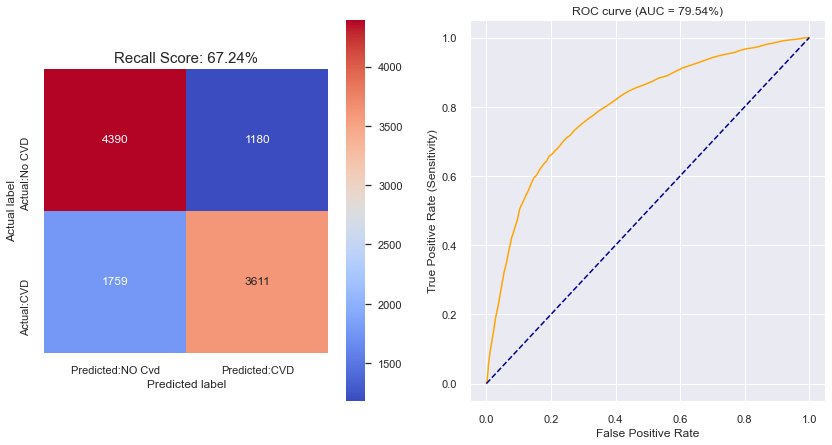

In [76]:
knn_tuned=KNeighborsClassifier(n_neighbors = 98)
knn_tuned.fit(X_train, y_train)
show_summary(knn_tuned, X_val, y_val)
plot_conf_ROC(knn_tuned, X_val, y_val)

In [77]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7238756855575869

In [78]:
svm = SVC()
svm.fit(X_train, y_train) 
svm_predictions = svm.predict(X_val) 
print(classification_report(y_val, svm_predictions)) 


              precision    recall  f1-score   support

           0       0.72      0.80      0.75      5570
           1       0.76      0.67      0.71      5370

    accuracy                           0.73     10940
   macro avg       0.74      0.73      0.73     10940
weighted avg       0.74      0.73      0.73     10940



Specificity :  0.7956912028725314
Sensitivity :  0.6713221601489758


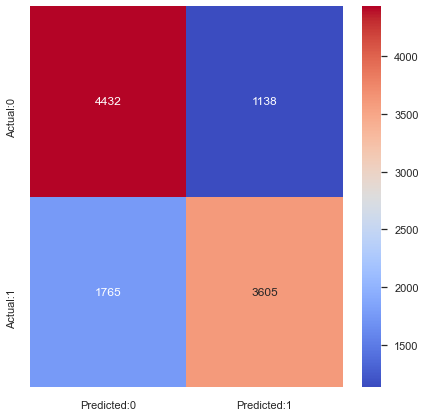

In [81]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y_val, svm_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)
    

In [82]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['rbf','linear','poly']}  
   
svm_tunned= GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1,cv=5) 
svm_tunned.fit(X_train, y_train) 
print(svm_tunned.best_params_) 
print(svm_tunned.best_estimator_)
svm_tunned_predictions = svm_tunned.predict(X_val) 
print(classification_report(y_val, svm_tunned_predictions)) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=10)
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5570
           1       0.76      0.67      0.71      5370

    accuracy                           0.73     10940
   macro avg       0.74      0.73      0.73     10940
weighted avg       0.74      0.73      0.73     10940



Specificity :  0.796229802513465
Sensitivity :  0.6705772811918064


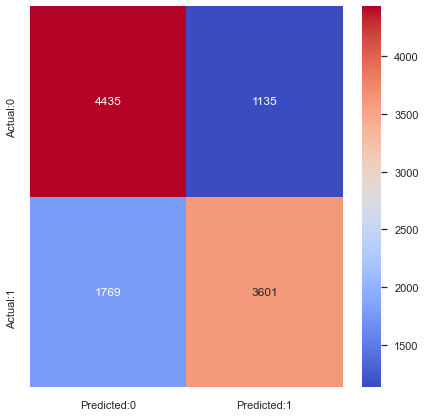

In [84]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y_val, svm_tunned_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)
    

In [87]:
y_pred = svm_tunned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7259963436928702

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

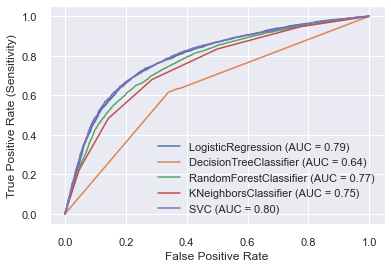

In [165]:
disp = plot_roc_curve(logreg, X_val, y_val)

plot_roc_curve(decision_tree,X_val, y_val, ax = disp.ax_)

plot_roc_curve(forest,X_val, y_val, ax = disp.ax_)

plot_roc_curve(knn,X_val, y_val, ax = disp.ax_)

plot_roc_curve(svm,X_val, y_val, ax = disp.ax_)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

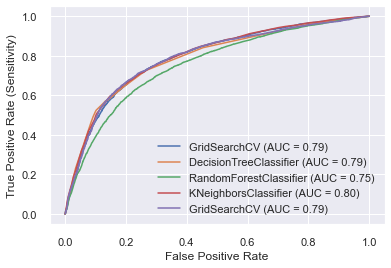

In [85]:
disp = plot_roc_curve(logreg_optimized, X_val, y_val)

plot_roc_curve(tree_tuned,X_val, y_val, ax = disp.ax_)

plot_roc_curve(forest_tuned,X_val, y_val, ax = disp.ax_)

plot_roc_curve(knn_tuned,X_val, y_val, ax = disp.ax_)

plot_roc_curve(svm_tunned,X_val, y_val, ax = disp.ax_)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')